In [1]:
from nltk.tokenize import sent_tokenize,word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
with open('/content/SMSSpamCollection','r') as file:
    text = file.readlines()

In [6]:
text

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv\n",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.\n',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call

In [7]:
# data = []
# for line in text:
#     label, text = line.strip().split('\t')
#     data.append([label, text])
# df = pd.DataFrame(data, columns=['label', 'text'])
# df

# Reading file
df = pd.read_csv('/content/SMSSpamCollection', sep='\t',  names=['label', 'text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
x = df['text']
y = df['label']

<Axes: xlabel='label', ylabel='count'>

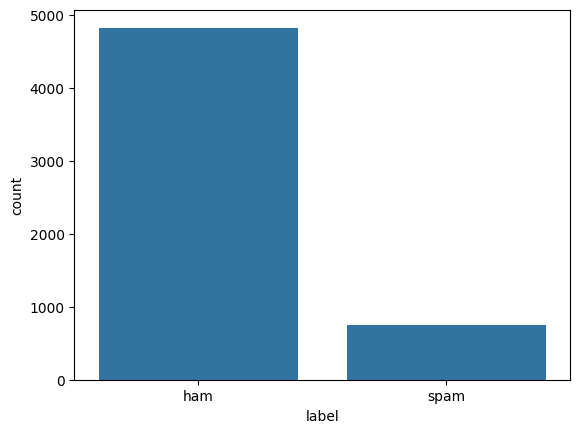

In [9]:
sns.countplot(x=df['label'])

In [10]:
y.value_counts()

,count
label,
ham,4825
spam,747


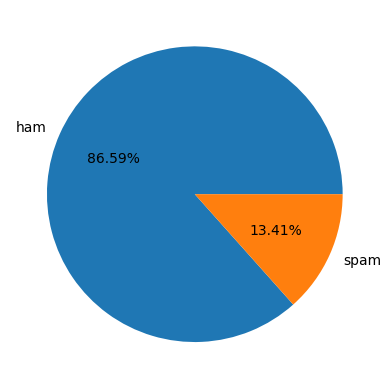

In [11]:
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%2.2f%%');

In [12]:
!pip install wordcloud pillow -U
from wordcloud import WordCloud

In [13]:
# crating seaparate strings for ham and spam
# ham = all msgs in ham
# spam = all msgs in spam

ham = x[y=='ham']
spam = x[y=='spam']

ham = ' '.join(ham)
spam = ' '.join(spam)


# zam = df[df['label']=='ham']
# zam

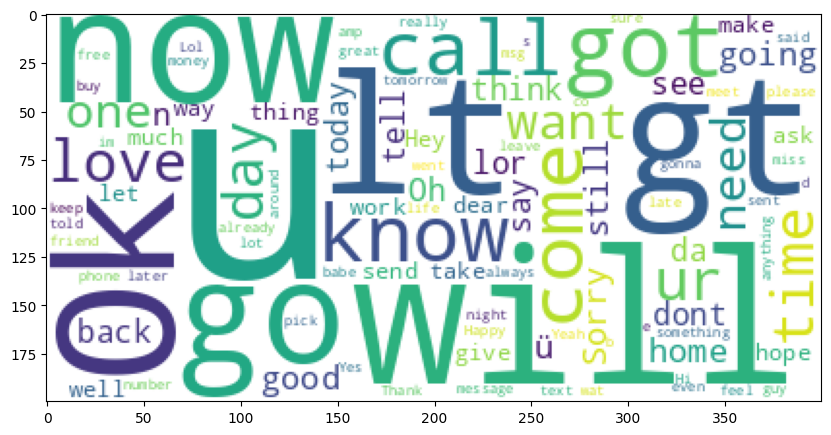

In [14]:
#Creating wordcloud for ham

wc_ham = WordCloud(background_color='white',
                   max_words=100).generate(ham)

plt.figure(figsize=(10,10))
plt.imshow(wc_ham)


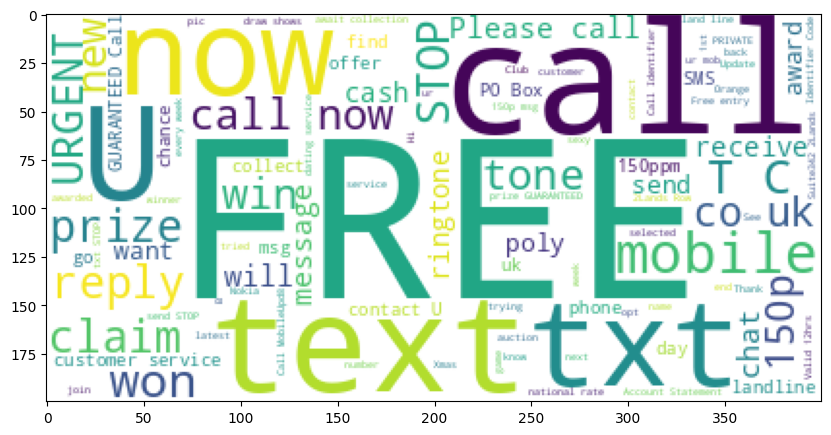

In [15]:
#Creating wordcloud for spam
wc_spam = WordCloud(background_color='white',
                   max_words=100).generate(spam)

plt.figure(figsize=(10,10))
plt.imshow(wc_spam)


In [16]:
wc_ham.words_

{'u': 1.0,
 'will': 0.33096446700507615,
 'lt gt': 0.2802030456852792,
 'Ok': 0.2649746192893401,
 'now': 0.2578680203045685,
 'go': 0.25583756345177666,
 'got': 0.2365482233502538,
 'know': 0.2182741116751269,
 'come': 0.21116751269035533,
 'call': 0.20812182741116753,
 'love': 0.20609137055837565,
 'time': 0.20101522842639594,
 'ur': 0.19898477157360406,
 'day': 0.18883248730964466,
 'want': 0.18781725888324874,
 'one': 0.17766497461928935,
 'need': 0.17563451776649747,
 'going': 0.1715736040609137,
 'good': 0.166497461928934,
 'Sorry': 0.15939086294416244,
 'ü': 0.15634517766497463,
 'home': 0.15532994923857868,
 'still': 0.1532994923857868,
 'da': 0.14416243654822336,
 'see': 0.14213197969543148,
 'today': 0.1401015228426396,
 'think': 0.13401015228426397,
 'n': 0.132994923857868,
 'lor': 0.12791878172588833,
 'tell': 0.12690355329949238,
 'dont': 0.12284263959390863,
 'say': 0.12081218274111676,
 'back': 0.12081218274111676,
 'Oh': 0.11573604060913706,
 'thing': 0.1147208121827411

In [17]:
# #Creating wordcloud for spam
# text = 'siddhi.'*50+'priya.'*25+'manu.'*40+'kedar.'*15
# wc_spam = WordCloud().generate(text)

# plt.figure(figsize=(10,10))
# plt.imshow(wc_spam)


**Data Preparation**

In [18]:
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import nltk
nltk.download('stopwords')

from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
sent = 'Hello friends! How are you? I like Python Programming'

In [20]:
#Tokenization
tokens1 = word_tokenize(sent)

#remove punctuation
tokens2 = [token for token in tokens1 if token.isalpha() or token.isdigit()]
print(tokens2)

#remove stopwords
sword = stopwords.words('english')
tokens3 = [token.lower() for token in tokens2 if token.lower() not in sword]
print(tokens3)

#Stemming
ps = PorterStemmer()
tokens4 = [ps.stem(token) for token in tokens3]
print(tokens4)

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'Python', 'Programming']
['hello', 'friends', 'like', 'python', 'programming']
['hello', 'friend', 'like', 'python', 'program']


In [21]:
#cleanText() - custom function for all steps above

def cleanText(sentence):
    tokens1 = word_tokenize(sentence)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    sword = stopwords.words('english')
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in sword]
    tokens4 = [ps.stem(token) for token in tokens3]
    return tokens4


In [22]:
sent = 'Hello friends! How are you? I like Python Programming'
cleanText(sent)

['hello', 'friend', 'like', 'python', 'program']

In [23]:
sent1= "It was nice working with you. Have a great day!"
cleanText(sent1)

['nice', 'work', 'great', 'day']

In [24]:
# Applying on x = df['text']
x.apply(cleanText)

,text
0,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,"[ok, lar, joke, wif, u, oni]"
2,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"[nah, think, goe, usf, live, around, though]"
...,...
5567,"[time, tri, contact, u, pound, prize, claim, e..."
5568,"[ü, b, go, esplanad, fr, home]"
5569,"[piti, mood, suggest]"
5570,"[guy, bitch, act, like, interest, buy, someth,..."


#### Apply TF*IDF Vectorize

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf = TfidfVectorizer(analyzer=cleanText)

x_new = tfidf.fit_transform(x)

print(x_new.shape)

(5572, 5925)


In [27]:
len(tfidf.get_feature_names_out())

5925

**Cross-Validatatiom**

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,random_state=0)
print(x_train.shape)
print(x_test.shape)

(4179, 5925)
(1393, 5925)


**Building SVM Model**

In [29]:
x_test

<1393x5925 sparse matrix of type '<class 'numpy.float64'>'
	with 11166 stored elements in Compressed Sparse Row format>

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [31]:
svm = SVC(kernel='linear')

svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.9827709978463748


In [32]:
# svm = SVC(kernel='rbf')

# svm.fit(x_train,y_train)
# y_pred = svm.predict(x_test)
# print(accuracy_score(y_test,y_pred))


In [33]:

# svm = SVC(kernel='poly')

# svm.fit(x_train,y_train)
# y_pred = svm.predict(x_test)
# print(accuracy_score(y_test,y_pred))


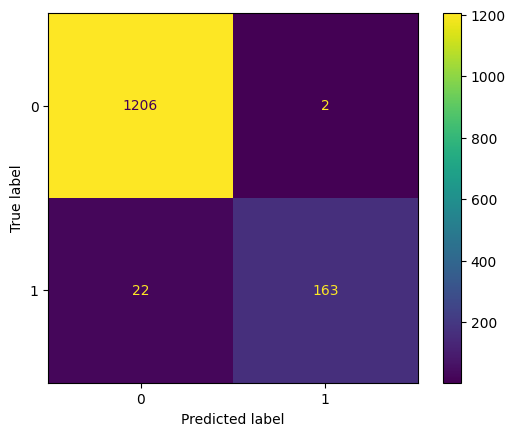

In [34]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



**Prediction on unknown msgs**

In [38]:
# test = pd.read_csv('sample.csv',sep='\t',names=['text'])
# pd.DataFrame(test)
# test_new = tfidf.transform(test['text'])
# y_pred = svm.predict(test_new)
# test['label'] = y_pred
# test

file=open('sample.csv')
lines=file.readlines()
svm.predict(tfidf.transform(lines))

array(['ham', 'spam', 'ham'], dtype=object)

### Save the model

In [41]:
import joblib

In [43]:
joblib.dump(svm, 'classifier.model')   #inverse function is load

['classifier.model']

In [44]:
classifier = joblib.load('classifier.model')

In [46]:
classifier.predict(tfidf.transform(lines))

array(['ham', 'spam', 'ham'], dtype=object)

In [47]:
joblib.dump(tfidf, 'tfidf.model')

['tfidf.model']

In [48]:
lines

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']